In [1]:
# Set up
%pylab inline

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import os
import pandas as pd
import scipy.stats

# Params
PTHRESH=0.8
PCOLORS = {
    "ALL": "black",
    1: "gray",
    2: "red",
    3: "gold",
    4: "blue",
    5: "green",
    6: "purple"
}
PLABELS = {
    "ALL": "ALL",
    1: "Mono-",
    2: "Di-",
    3: "Tri-",
    4: "Tetra-",
    5: "Penta-",
    6: "Hexa-"
}

# Load data
RESDIR="/storage/mgymrek/ssc-denovos/denovos2/denovocalls_filtered/"
MUTEADIR="/storage/mgymrek/ssc-denovos/mutea-results/"
DATADIR="/storage/mgymrek/ssc-denovos/denovos2/other-data/"
mut = pd.read_csv(os.path.join(RESDIR, "denovos_bylength.all_mutations_pass.tab.gz"), sep="\t")
mutea = pd.read_csv(os.path.join(MUTEADIR, "ssc_mutea_auto_scaled.bed.gz"), sep="\t",
                   names=["#chrom","pos", "end","log10mu","beta","p","stderr","nsamp","center"])
mut = pd.merge(mut, mutea, on=["#chrom","pos"])
mut["center_bp"] = mut["center"]*mut["period"]
age = pd.read_excel("/home/mgymrek/workspace/ssc-imputation/metadata/ssc_age_info_Sebat.xlsx")
age["family"] = age["Family_ID"]
age["child"] = age["Individual_ID"]
age = age[~(age["Paternal_ID"]==0)]
age = age[["family","child","Father_age_at_birth","Mother_age_at_birth"]]
data = {}
data["ALL"] = pd.read_csv(os.path.join(RESDIR, "denovos_bylength_bychild2.tab"), sep="\t")
for period in range(1, 7):
    data[period] = pd.read_csv(os.path.join(RESDIR, "denovos_bylength_bychild2_period%s.tab"%period), sep="\t")
sgdp = pd.read_csv(os.path.join(DATADIR, "Gymrek_etal_SupplementalData1_v2.bed.gz"), sep="\t", usecols=range(4))
ssc = pd.read_csv(os.path.join(MUTEADIR, "ssc_mutea_auto_scaled.bed.gz"), sep="\t",
                  usecols=range(4), names=["#chrom","start","end","est_logmu_ml_ssc"])
models = pd.read_csv("../../mutation-rates/expected-rates/rate_model_params.tab", sep="\t")
MUTEAP = {}
for period in range(1, 7):
    meanp = models[models["period"]==period]["meanp"].values[0]
    MUTEAP[period] = meanp
    
# Outputs
OUTPATH = "pdfs"
PREFIX = "Figure2"

Populating the interactive namespace from numpy and matplotlib


# Figure 2A: Step size distributions

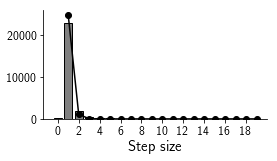

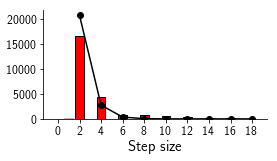

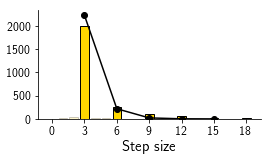

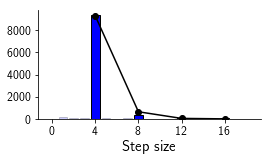

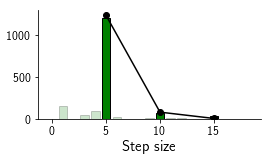

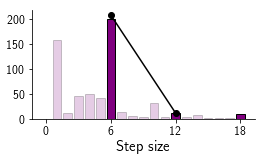

In [23]:
# For each period, plot step size distribution

def GetGeomCount(n, p, k):
    return (1-p)**(k-1)*p*n

for period in range(1, 7):
    maxallele = 20
    step_sizes = mut[(mut["period"]==period) & ~np.isnan(mut["mutsize"])]["mutsize"].apply(abs)
    fig = plt.figure()
    fig.set_size_inches((4,2))
    ax = fig.add_subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    counts, bins = np.histogram(list(step_sizes), bins=np.arange(0, maxallele, 1))
    ax.bar([bins[i] for i in range(len(bins)-1) if bins[i]%period==0],
           [counts[i] for i in range(len(bins)-1) if bins[i]%period==0],
          color=PCOLORS[period], edgecolor="black")
    ax.bar([bins[i] for i in range(len(bins)-1) if bins[i]%period!=0],
           [counts[i] for i in range(len(bins)-1) if bins[i]%period!=0],
          color=PCOLORS[period], alpha=0.2, edgecolor="black")
    ax.set_xticks(np.arange(0, maxallele, period))
    if period == 1:
        ax.set_xticks([int(item) for item in ax.get_xticks() if item%2==0])
    else: 
        ax.set_xticks([int(item) for item in ax.get_xticks() if item%period==0])
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels([int(item) for item in ax.get_yticks()], size=12)
    ax.set_xlabel("Step size", size=15)
    #ax.set_ylabel("Number of mutations", size=15);
    
    # Get geometric fit for the unit ones
    step_sizes_unit = [item/period for item in step_sizes if item%period == 0] #1/np.mean(step_sizes_unit) #
    geomp = MUTEAP[period]
    xvals = [item*period for item in range(1, int(maxallele/period))]
    yvals = [GetGeomCount(len(step_sizes_unit), geomp, item/period) for item in xvals]
    ax.plot(xvals, yvals, marker="o", color="black")
    fig.savefig(os.path.join(OUTPATH, "%s_stepsize_period%s.pdf"%(PREFIX, period)))

# Figure 2B: Length effect

# Figure 2C: Directional bias

In [6]:
mut.head()

,#chrom,pos,period,prior,family,child,phenotype,posterior,newallele,mutsize,...,ctrl_count,unk_count,end,log10mu,beta,p,stderr,nsamp,center,center_bp
0,1,866512,4,0.000013,14681,SSC12506,2,1.000000,4,4,...,516,1026,866526,-4.68452,0.899601,1.0,0.229801,708,1,4
1,1,866512,4,0.000013,14645,SSC12781,2,0.995688,4,4,...,516,1026,866526,-4.68452,0.899601,1.0,0.229801,708,1,4
2,1,866512,4,0.000013,14493,SSC11274,2,1.000000,0,-4,...,170,386,866526,-4.68452,0.899601,1.0,0.229801,708,1,4
3,1,866512,4,0.000013,13211,SSC07877,1,0.966637,4,4,...,516,1026,866526,-4.68452,0.899601,1.0,0.229801,708,1,4
4,1,866512,4,0.000013,11390,SSC00895,1,1.000000,0,-4,...,170,386,866526,-4.68452,0.899601,1.0,0.229801,708,1,4


(-0.1331136703055279, 2.6038570025824723e-42)
(-0.096828946870395546, 2.4869951545092503e-20)
(-0.17423656081924715, 2.5167281062129294e-12)
(-0.20785640202717637, 3.4809268590021913e-63)
(-0.09863736212635156, 0.0042391212409247864)
-0.0611886612821


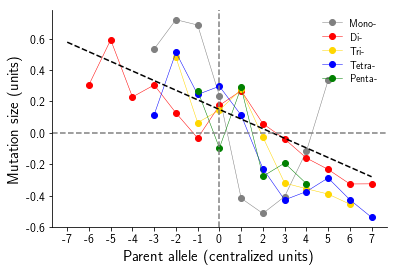

In [26]:
# For each period, plot mutation direction bias
mut["from"] = (mut["newallele"]-mut["mutsize"]-mut["center_bp"])/mut["period"]
mut["step"] = mut["mutsize"]/mut["period"]

fig = plt.figure()
ax = fig.add_subplot(111)
n = 7
maxper = 5
maxmutsize = 3
fvals = np.arange(-1*n, n+1, 1)
for period in range(1, maxper+1):
    d = mut[(mut["period"]==period)&(mut["mutsize"].apply(lambda x: x%period == 0))]
    d = d[d["step"].apply(abs)<=maxmutsize]
    stepmeans = []
    for f in fvals:
        m = np.mean(d[d["from"]==f]["step"])
        if d[d["from"]==f].shape[0] < 25:
            stepmeans.append(np.nan)
        else: stepmeans.append(m)
    ax.plot(fvals, stepmeans, color=PCOLORS[period], marker="o", linewidth=0.5, label=PLABELS[period])
    print(str(scipy.stats.pearsonr(d["from"], d["step"])))
# Get best fit line
d = mut[mut.apply(lambda x: x["mutsize"]%x["period"]==0, 1)&(mut["period"]<=maxper)]
d = d[d["step"].apply(abs)<=maxmutsize]
xd = list(d["from"])
yd = list(d["step"])
par = np.polyfit(xd, yd, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = fvals
yl = [slope*xx + intercept  for xx in xl]
print(slope)
ax.plot(xl, yl, linestyle="dashed", color="black")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(fvals)
ax.set_xticklabels(ax.get_xticks(), size=12);
ax.set_yticklabels(ax.get_yticks(), size=12);
ax.set_xlabel("Parent allele (centralized units)", size=15);
ax.set_ylabel("Mutation size (units)", size=15);
ax.axhline(y=0, linestyle="dashed", color="gray")
ax.axvline(x=0, linestyle="dashed", color="gray");
ax.legend(loc="upper right", frameon=False)
fig.savefig(os.path.join(OUTPATH, "%s_directionbias.pdf"%(PREFIX)))

# Figure 2D: Parent of origin

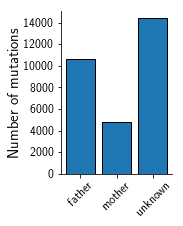

In [138]:
# Parent of origin
poocase = {
    21: "father",
    2: "father",
    3: "mother",
    31: "mother",
    4: "unknown",
    41: "unknown",
}
mut["poo"] = mut.apply(lambda x: poocase[x["poocase"]], 1)
mut["unit"] = mut.apply(lambda x: x["mutsize"]%x["period"]==0, 1)
categories = ["father","mother","unknown"]
counts = []
for c in categories:
    counts.append(mut[(mut["poo"]==c) & mut["unit"]].shape[0])
fig = plt.figure()
fig.set_size_inches((2,3))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.bar(range(len(categories)), counts, edgecolor="black");
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, size=12, rotation=45);
ax.set_yticklabels(map(int, ax.get_yticks()), size=12)
ax.set_ylabel("Number of mutations", size=15);
fig.savefig(os.path.join(OUTPATH, "%s_poo.pdf"%(PREFIX)))

# Figure 2E: Age of parents

(0.26657978791940107, 7.1712607288024259e-17)
(0.036666060321280745, 0.28251654600823989)


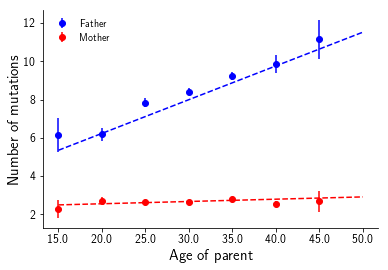

In [137]:
mutdata = pd.merge(mut, age, on=["family","child"])
mutdata = mutdata[mutdata["period"]!=1]
mutdata = mutdata.groupby(["child","poo"], as_index=False).agg({"mutsize": len, "Father_age_at_birth": np.mean, "Mother_age_at_birth": np .mean})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
f = mutdata[mutdata["poo"]=="father"]
m = mutdata[mutdata["poo"]=="mother"]

agebins = np.arange(15, 51, 5)
fdata = []
fdata_err = []
mdata = []
mdata_err = []
for i in range(len(agebins)-1):
    lb = agebins[i]
    ub = agebins[i+1]
    xf = f[(f["Father_age_at_birth"]>=lb) & (f["Father_age_at_birth"]<ub)]
    fdata.append(np.mean(xf["mutsize"]))
    fdata_err.append(np.sqrt(np.var(xf["mutsize"])/xf.shape[0]))
    xm = m[(m["Father_age_at_birth"]>=lb) & (m["Father_age_at_birth"]<ub)]
    mdata.append(np.mean(xm["mutsize"]))
    mdata_err.append(np.sqrt(np.var(xm["mutsize"])/xm.shape[0]))
ax.errorbar(agebins[:-1], fdata, yerr=fdata_err, color="blue", fmt="o", label="Father")
ax.errorbar(agebins[:-1], mdata, yerr=mdata_err, color="red", fmt="o", label="Mother")

# Best fit line - Father
xd = list(f["Father_age_at_birth"])
yd = list(f["mutsize"])
par = np.polyfit(xd, yd, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = agebins
yl = [slope*xx + intercept  for xx in xl]
ax.plot(xl, yl, linestyle="dashed", color="blue")

# Best fit line - Mother
xd = list(m["Mother_age_at_birth"])
yd = list(m["mutsize"])
par = np.polyfit(xd, yd, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = agebins
yl = [slope*xx + intercept  for xx in xl]
ax.plot(xl, yl, linestyle="dashed", color="red")

ax.set_xlabel("Age of parent", size=15)
ax.set_ylabel("Number of mutations", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], size=12)
ax.legend(loc="upper left", frameon=False)
print(scipy.stats.pearsonr(f["Father_age_at_birth"], f["mutsize"]))
print(scipy.stats.pearsonr(m["Mother_age_at_birth"], m["mutsize"]))
fig.savefig(os.path.join(OUTPATH, "%s_parentage.pdf"%(PREFIX)))
